# <font color = gold>Практическая работа №1 </font>

## <font color = pink>*Выполнил студент группы ММР 211 Инжутов Павел Игорвеич*</font>

*****

<div class='alert alert-block alert-success'>
<b>Загружаем встроенные библиотеки</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

<div class='alert alert-block alert-success'>
<b>Загружаем датасет из файла Excel, скаченный с сайта Единой межведомственной информационно-статистическаой системы России (ЕМИСС) и просматриваем его часть</b>
</div>

### Продажа алкогольных напитков в натуральном выражении по субъектам Российской Федерации с 2010 г. оп 2016 г.

[https://www.fedstat.ru/indicator/40619](https://www.fedstat.ru/indicator/40619)

In [2]:
alco = pd.read_excel('/Users/inzutov/Yandex.Disk.localized/ВШЭ/Data science/Rabota_1/data.xls')

In [3]:
alco

,Субъект РФ,Продукция,2010,2011,2012,2013,2014,2015,2016
0,Российская Федерация,Вина виноградные специальные,22.9,19.6,14.6,NaN,NaN,NaN,NaN
1,Российская Федерация,Вина виноградные столовые,62.2,62.0,54.3,NaN,NaN,NaN,NaN
2,Российская Федерация,Вина игристые и шампанские,27.3,28.5,28.3,27.7,26.4,23.59,22.0
3,Российская Федерация,"Вина плодовые (включая сидры, медовые вина и н...",12.3,10.1,7.7,NaN,NaN,NaN,NaN
4,Российская Федерация,Вино,NaN,NaN,61.8,60.2,57.8,53.58,51.9
...,...,...,...,...,...,...,...,...,...
1927,Чукотский автономный округ,"Напитки винные (виноградные и плодовые, в том ...",0.3,0.6,0.9,NaN,NaN,5.50,NaN
1928,Чукотский автономный округ,Напитки слабоалкогольные (с содержанием этилов...,27.8,15.8,8.4,1.6,0.7,0.20,0.0
1929,Чукотский автономный округ,"Напитки, изготавливаемые на основе пива",NaN,NaN,NaN,4.0,5.6,5.90,2.2
1930,Чукотский автономный округ,"Пиво, кроме коктейлей пивных и напитка солодового",89.8,85.7,122.0,136.7,165.1,158.60,169.8


In [4]:
alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Субъект РФ  1932 non-null   object 
 1   Продукция   1932 non-null   object 
 2   2010        1196 non-null   float64
 3   2011        1196 non-null   float64
 4   2012        1564 non-null   float64
 5   2013        1316 non-null   float64
 6   2014        1358 non-null   float64
 7   2015        1455 non-null   float64
 8   2016        1344 non-null   float64
dtypes: float64(7), object(2)
memory usage: 136.0+ KB


### Методика расчета
Приводятся данные о продаже алкогольных напитков населению в натуральном выражении. Информация представляется в декалитрах - один декалитр равен 10 литрам. Данные по строке Российская Федерация приводятся в млн. декалитров.

### Комментарии
С 2017 года субъектом официального статистического учета, осуществляющим формирование и предоставление пользователям официальной статистической информации об объеме розничной продажи алкогольной продукции, является Росалкогольрегулирование. Информацию с 2017 г. см. в разделе 60.Федеральная служба по регулированию алкогольного рынка / 60.08 и 60.10.

#### Единицы измерения
тысяча декалитров
#### Период действия
с 01.01.2010 по 31.12.2016

<div class='alert alert-block alert-success'>
<b>Выберем наиболее популярные позиции в России для дальнейшего анализа</b>
</div>

In [5]:
list(alco['Продукция'].unique())

['Вина виноградные специальные',
 'Вина виноградные столовые',
 'Вина игристые и шампанские',
 'Вина плодовые (включая сидры, медовые вина и напитки)',
 'Вино',
 'Вино ликерное',
 'Вино фруктовое',
 'Вино фруктовое (плодовое)',
 'Виски',
 'Водка',
 'Коньяки, коньячные напитки (включая бренди, кальвадосы)',
 'Ликероводочные изделия с содержанием спирта до 25%',
 'Ликероводочные изделия с содержанием этилового спирта свыше 25%',
 'Напитки винные',
 'Напитки винные (виноградные и плодовые) с содержанием спирта свыше 25 % от объема готовой продукции',
 'Напитки винные (виноградные и плодовые, в том числе медовые) с содержанием спирта до 25 % включительно от объема готовой продукции, включая коктейли винные газированные',
 'Напитки слабоалкогольные (с содержанием этилового спирта не более 9%)',
 'Напитки, изготавливаемые на основе пива',
 'Пиво, кроме коктейлей пивных и напитка солодового',
 'Прочая алкогольная продукция (сидр, пуаре, медовуха и др.)']

In [6]:
list(alco['Субъект РФ'].unique())

['Российская Федерация',
 '    Центральный федеральный округ',
 '        Белгородская область',
 '        Брянская область',
 '        Владимирская область',
 '        Воронежская область',
 '        Ивановская область',
 '        Калужская область',
 '        Костромская область',
 '        Курская область',
 '        Липецкая область',
 '        Московская область',
 '        Орловская область',
 '        Рязанская область',
 '        Смоленская область',
 '        Тамбовская область',
 '        Тверская область',
 '        Тульская область',
 '        Ярославская область',
 '        Город Москва столица Российской Федерации город федерального значения',
 '    Северо-Западный федеральный округ',
 '        Республика Карелия',
 '        Республика Коми',
 '        Архангельская область',
 '            Ненецкий автономный округ (Архангельская область)',
 '            Архангельская область (кроме Ненецкого автономного округа)',
 '        Вологодская область',
 '        Калининградская о

In [7]:
alco_top = alco[alco['Субъект РФ'] == 'Российская Федерация']
alco_top['c 2010 по 2016'] = alco_top.loc[:,'2010':'2016'].sum(axis=1)
alco_top['c 2010 по 2016']=round(alco_top['c 2010 по 2016'], 3)
warnings.filterwarnings("ignore")

/var/folders/54/5kl8j40n11l4sc38992lq7s40000gn/T/ipykernel_2588/3902148140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alco_top['c 2010 по 2016'] = alco_top.loc[:,'2010':'2016'].sum(axis=1)
/var/folders/54/5kl8j40n11l4sc38992lq7s40000gn/T/ipykernel_2588/3902148140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alco_top['c 2010 по 2016']=round(alco_top['c 2010 по 2016'], 3)


<div class='alert alert-block alert-success'>
<b>Поскольку мы специально сделали копию для анализа, то не обращаем внимания на предупреждения, если они возникают</b>
</div>

In [8]:
alco_top = alco_top.sort_values('c 2010 по 2016', ascending=False)
alco_top.head(10)

,Субъект РФ,Продукция,2010,2011,2012,2013,2014,2015,2016,c 2010 по 2016
18,Российская Федерация,"Пиво, кроме коктейлей пивных и напитка солодового",1004.0,1011.5,1017.5,984.2,895.9,810.22,780.6,6503.92
9,Российская Федерация,Водка,134.7,133.9,130.1,111.7,93.4,80.60,81.0,765.40
4,Российская Федерация,Вино,NaN,NaN,61.8,60.2,57.8,53.58,51.9,285.28
17,Российская Федерация,"Напитки, изготавливаемые на основе пива",NaN,NaN,NaN,37.1,56.5,63.58,60.0,217.18
2,Российская Федерация,Вина игристые и шампанские,27.3,28.5,28.3,27.7,26.4,23.59,22.0,183.79
1,Российская Федерация,Вина виноградные столовые,62.2,62.0,54.3,NaN,NaN,NaN,NaN,178.50
16,Российская Федерация,Напитки слабоалкогольные (с содержанием этилов...,31.9,31.4,26.9,23.3,17.8,10.03,8.8,150.13
13,Российская Федерация,Напитки винные,NaN,NaN,1.4,15.1,25.1,22.60,26.3,90.50
10,Российская Федерация,"Коньяки, коньячные напитки (включая бренди, ка...",11.1,11.6,12.4,12.1,11.5,10.57,10.3,79.57
0,Российская Федерация,Вина виноградные специальные,22.9,19.6,14.6,NaN,NaN,NaN,NaN,57.10


<AxesSubplot:xlabel='Продукция'>

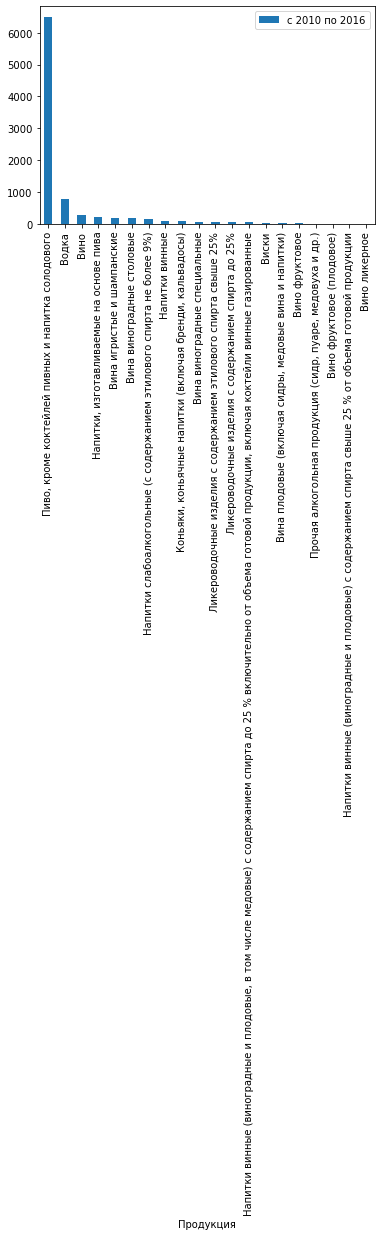

In [9]:
alco_top.plot.bar(y='c 2010 по 2016', x='Продукция')

Из графика видим наиболее ТОПовые категории в порядке убывания по продажам в миллионах декалитров

#### Для анализа выбраны 7 топовых категории по России:
<ol>
<li>Пиво</li>
<li>Водка</li>
<li>Вино</li>
<li>Пивные напитки</li>
<li>Вина игристые и шампанские</li>
<li>Вина виноградные столовые</li>
<li>Слабоалкогольные напитки</li>
</ol>

<div class='alert alert-block alert-success'>
<b>Приводим датафрйм в вид, необходимый нам для анализа</b>
</div>

In [10]:
alco.loc[alco["Продукция"] == "Пиво, кроме коктейлей пивных и напитка солодового", "Продукция"] = 'Пиво'
alco.loc[alco["Продукция"] == "Напитки, изготавливаемые на основе пива", "Продукция"] = 'Пивные напитки'
alco.loc[alco["Продукция"] == "Напитки слабоалкогольные (с содержанием этилового спирта не более 9%)", "Продукция"] = 'Слабоалкогольные напитки'

In [11]:
alco = alco[(alco['Продукция'] == 'Пиво') | (alco['Продукция'] =='Водка') | (alco['Продукция'] =='Вино') | (alco['Продукция'] =='Пивные напитки') | (alco['Продукция'] =='Вина игристые и шампанские') | (alco['Продукция'] =='Вина виноградные столовые') | (alco['Продукция'] =='Слабоалкогольные напитки')]

In [12]:
alco = alco[(alco['Субъект РФ'] != 'Российская Федерация')]

In [13]:
alco['c 2010 по 2016'] = alco.loc[:,'2010':'2016'].sum(axis=1)
alco['c 2010 по 2016']=round(alco['c 2010 по 2016'], 3)

In [14]:
alco_top.loc[alco_top["Продукция"] == "Пиво, кроме коктейлей пивных и напитка солодового", "Продукция"] = 'Пиво'
alco_top.loc[alco_top["Продукция"] == "Напитки, изготавливаемые на основе пива", "Продукция"] = 'Пивные напитки'
alco_top.loc[alco_top["Продукция"] == "Напитки слабоалкогольные (с содержанием этилового спирта не более 9%)", "Продукция"] = 'Слабоалкогольные напитки'

#### Для анализа в таблице оставлены только округа, все знасения в декалитрах, оставлены только 7 ТОПовых категорий по России и добавлен столбец суммы за 7 лет

In [15]:
alco

,Субъект РФ,Продукция,2010,2011,2012,2013,2014,2015,2016,c 2010 по 2016
21,Центральный федеральный округ,Вина виноградные столовые,19631.8,19729.7,17404.2,NaN,NaN,NaN,NaN,56765.7
22,Центральный федеральный округ,Вина игристые и шампанские,10860.2,11238.0,11192.5,11045.6,10592.4,9585.4,8815.0,73329.1
24,Центральный федеральный округ,Вино,NaN,NaN,19392.1,19166.1,19240.4,17566.8,16758.5,92123.9
29,Центральный федеральный округ,Водка,38322.5,38614.3,37192.5,35209.6,30503.4,26779.7,26447.5,233069.5
36,Центральный федеральный округ,Слабоалкогольные напитки,9676.3,9630.5,8199.9,7222.5,6317.2,4265.8,3690.0,49002.2
...,...,...,...,...,...,...,...,...,...,...
1916,Чукотский автономный округ,Вино,NaN,NaN,20.9,18.1,16.8,17.0,16.3,89.1
1921,Чукотский автономный округ,Водка,78.4,71.7,67.0,64.2,53.6,52.5,44.9,432.3
1928,Чукотский автономный округ,Слабоалкогольные напитки,27.8,15.8,8.4,1.6,0.7,0.2,0.0,54.5
1929,Чукотский автономный округ,Пивные напитки,NaN,NaN,NaN,4.0,5.6,5.9,2.2,17.7


<AxesSubplot:>

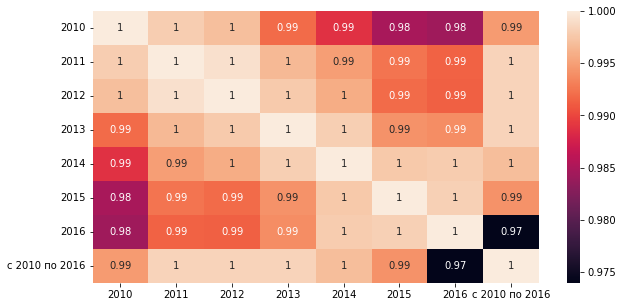

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.heatmap(alco.corr(),annot=True)

Text(0.5, 1.0, '3 sigma')

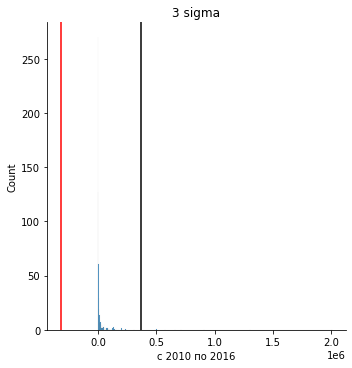

In [17]:
def find_anomaly(df = alco, column = 'c 2010 по 2016'): 
    upper_level = df[column].mean() + 3 * df[column].std()
    lower_level = df[column].mean() - 3 * df[column].std()
    anomaly = df[(df[column] > upper_level) & (df[column] < lower_level)]
    return upper_level, lower_level, anomaly

anomaly = find_anomaly(df = alco, column = 'c 2010 по 2016')

sns.displot (alco['c 2010 по 2016'])
plt.axvline(x = anomaly [0], color = 'black', linestyle = '-')
plt.axvline(x = anomaly [1], color = 'red', linestyle = '-')
plt.title('3 sigma')

<div class='alert alert-block alert-success'>
<b>По результатам анализа корреляции и метода 3 Сигм, видим, что данные в датасете пригодны для дальнейшего анализа, выборы отсутствуют</b>
</div>

In [18]:
alco['c 2010 по 2016'].median()

2656.9

In [19]:
alco['c 2010 по 2016'].mean()

24975.35921248142

In [20]:
alco.describe()

,2010,2011,2012,2013,2014,2015,2016,c 2010 по 2016
count,455.000000,455.000000,546.000000,558.000000,576.000000,576.000000,570.000000,6.730000e+02
mean,5584.428791,5617.180659,4871.706593,4542.398925,4063.430295,3690.723090,3597.687193,2.497536e+04
std,21089.946776,21532.875934,19831.845662,19246.133340,17205.756457,15715.877001,15266.917055,1.146551e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,218.650000,206.850000,211.375000,181.775000,155.700000,124.575000,110.250000,1.045600e+03
50%,711.600000,733.600000,633.700000,550.850000,539.200000,492.050000,474.500000,2.656900e+03
75%,2721.050000,2797.800000,2187.975000,1767.075000,1583.575000,1414.675000,1363.025000,9.168400e+03
max,293562.400000,309351.500000,306295.400000,305276.000000,280066.000000,263171.400000,249517.900000,2.007241e+06


Посмотрели среднее и медиану за весь период отдельно по продуктам и регионам. А также информацию оп разбрсу по годам.

In [21]:
alco = alco.drop(columns='c 2010 по 2016') 
alco=alco.melt(id_vars=["Субъект РФ", "Продукция"], var_name="Год", value_name="Объем")
alco[['Год']] = alco[['Год']].apply(pd.to_numeric) 
alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Субъект РФ  4711 non-null   object 
 1   Продукция   4711 non-null   object 
 2   Год         4711 non-null   int64  
 3   Объем       3736 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 147.3+ KB


In [22]:
alco.isna().sum()

Субъект РФ      0
Продукция       0
Год             0
Объем         975
dtype: int64

In [23]:
alco=alco.dropna()

In [24]:
alco

,Субъект РФ,Продукция,Год,Объем
0,Центральный федеральный округ,Вина виноградные столовые,2010,19631.8
1,Центральный федеральный округ,Вина игристые и шампанские,2010,10860.2
3,Центральный федеральный округ,Водка,2010,38322.5
4,Центральный федеральный округ,Слабоалкогольные напитки,2010,9676.3
6,Центральный федеральный округ,Пиво,2010,293562.4
...,...,...,...,...
4706,Чукотский автономный округ,Вино,2016,16.3
4707,Чукотский автономный округ,Водка,2016,44.9
4708,Чукотский автономный округ,Слабоалкогольные напитки,2016,0.0
4709,Чукотский автономный округ,Пивные напитки,2016,2.2


<div class='alert alert-block alert-success'>
<b>Привели датафрйм в вид по наблюдениям, а также удалили пропущенные значения</b>
</div>

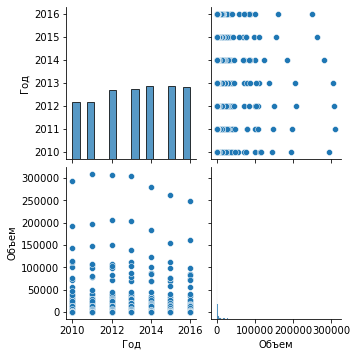

In [25]:
sns.pairplot(alco.iloc[:,:]);

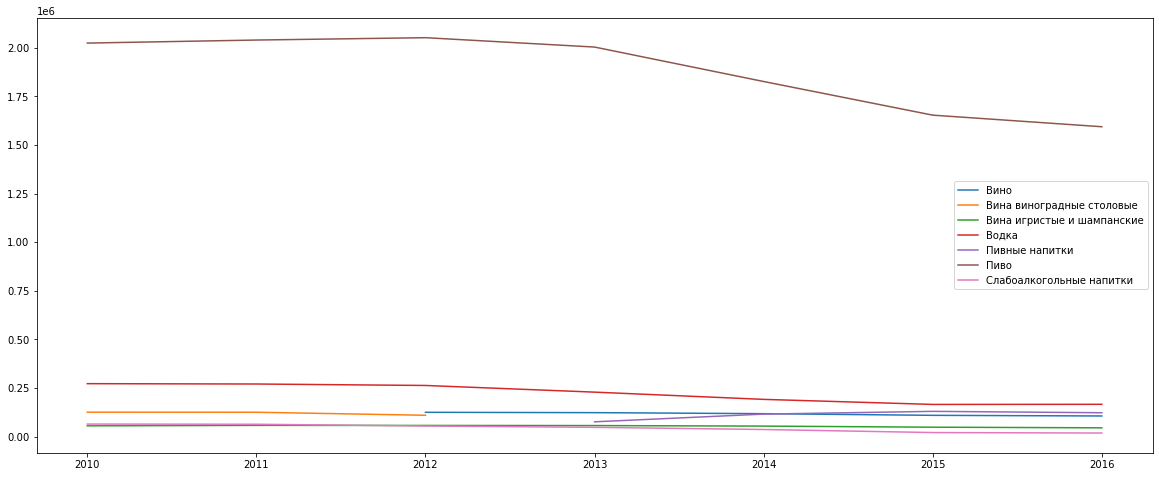

In [26]:
prod = alco.groupby(['Продукция', 'Год'])['Объем'].sum()
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(prod.loc['Вино'])
ax.plot(prod.loc['Вина виноградные столовые'])
ax.plot(prod.loc['Вина игристые и шампанские'])
ax.plot(prod.loc['Водка'])
ax.plot(prod.loc['Пивные напитки'])
ax.plot(prod.loc['Пиво'])
ax.plot(prod.loc['Слабоалкогольные напитки'])
ax.legend(['Вино', 'Вина виноградные столовые', 'Вина игристые и шампанские', 'Водка', 'Пивные напитки', 'Пиво', 'Слабоалкогольные напитки'])

#### Видно на сколько сильно выше потребление пива по сравнению с остальными напитками. При этом потребление алкоголя уменьшается по всем категориям, кроме пивных напитков.

In [27]:
subset1 = ['Субъект РФ']
que = alco.duplicated(subset=subset1,keep=False)
df = alco[que].groupby(subset1)['Объем'].sum()
alco_sub = alco.groupby(subset1)['Объем'].sum().reset_index()
alco_sub = alco_sub.sort_values('Объем', ascending=False)

<AxesSubplot:ylabel='Субъект РФ'>

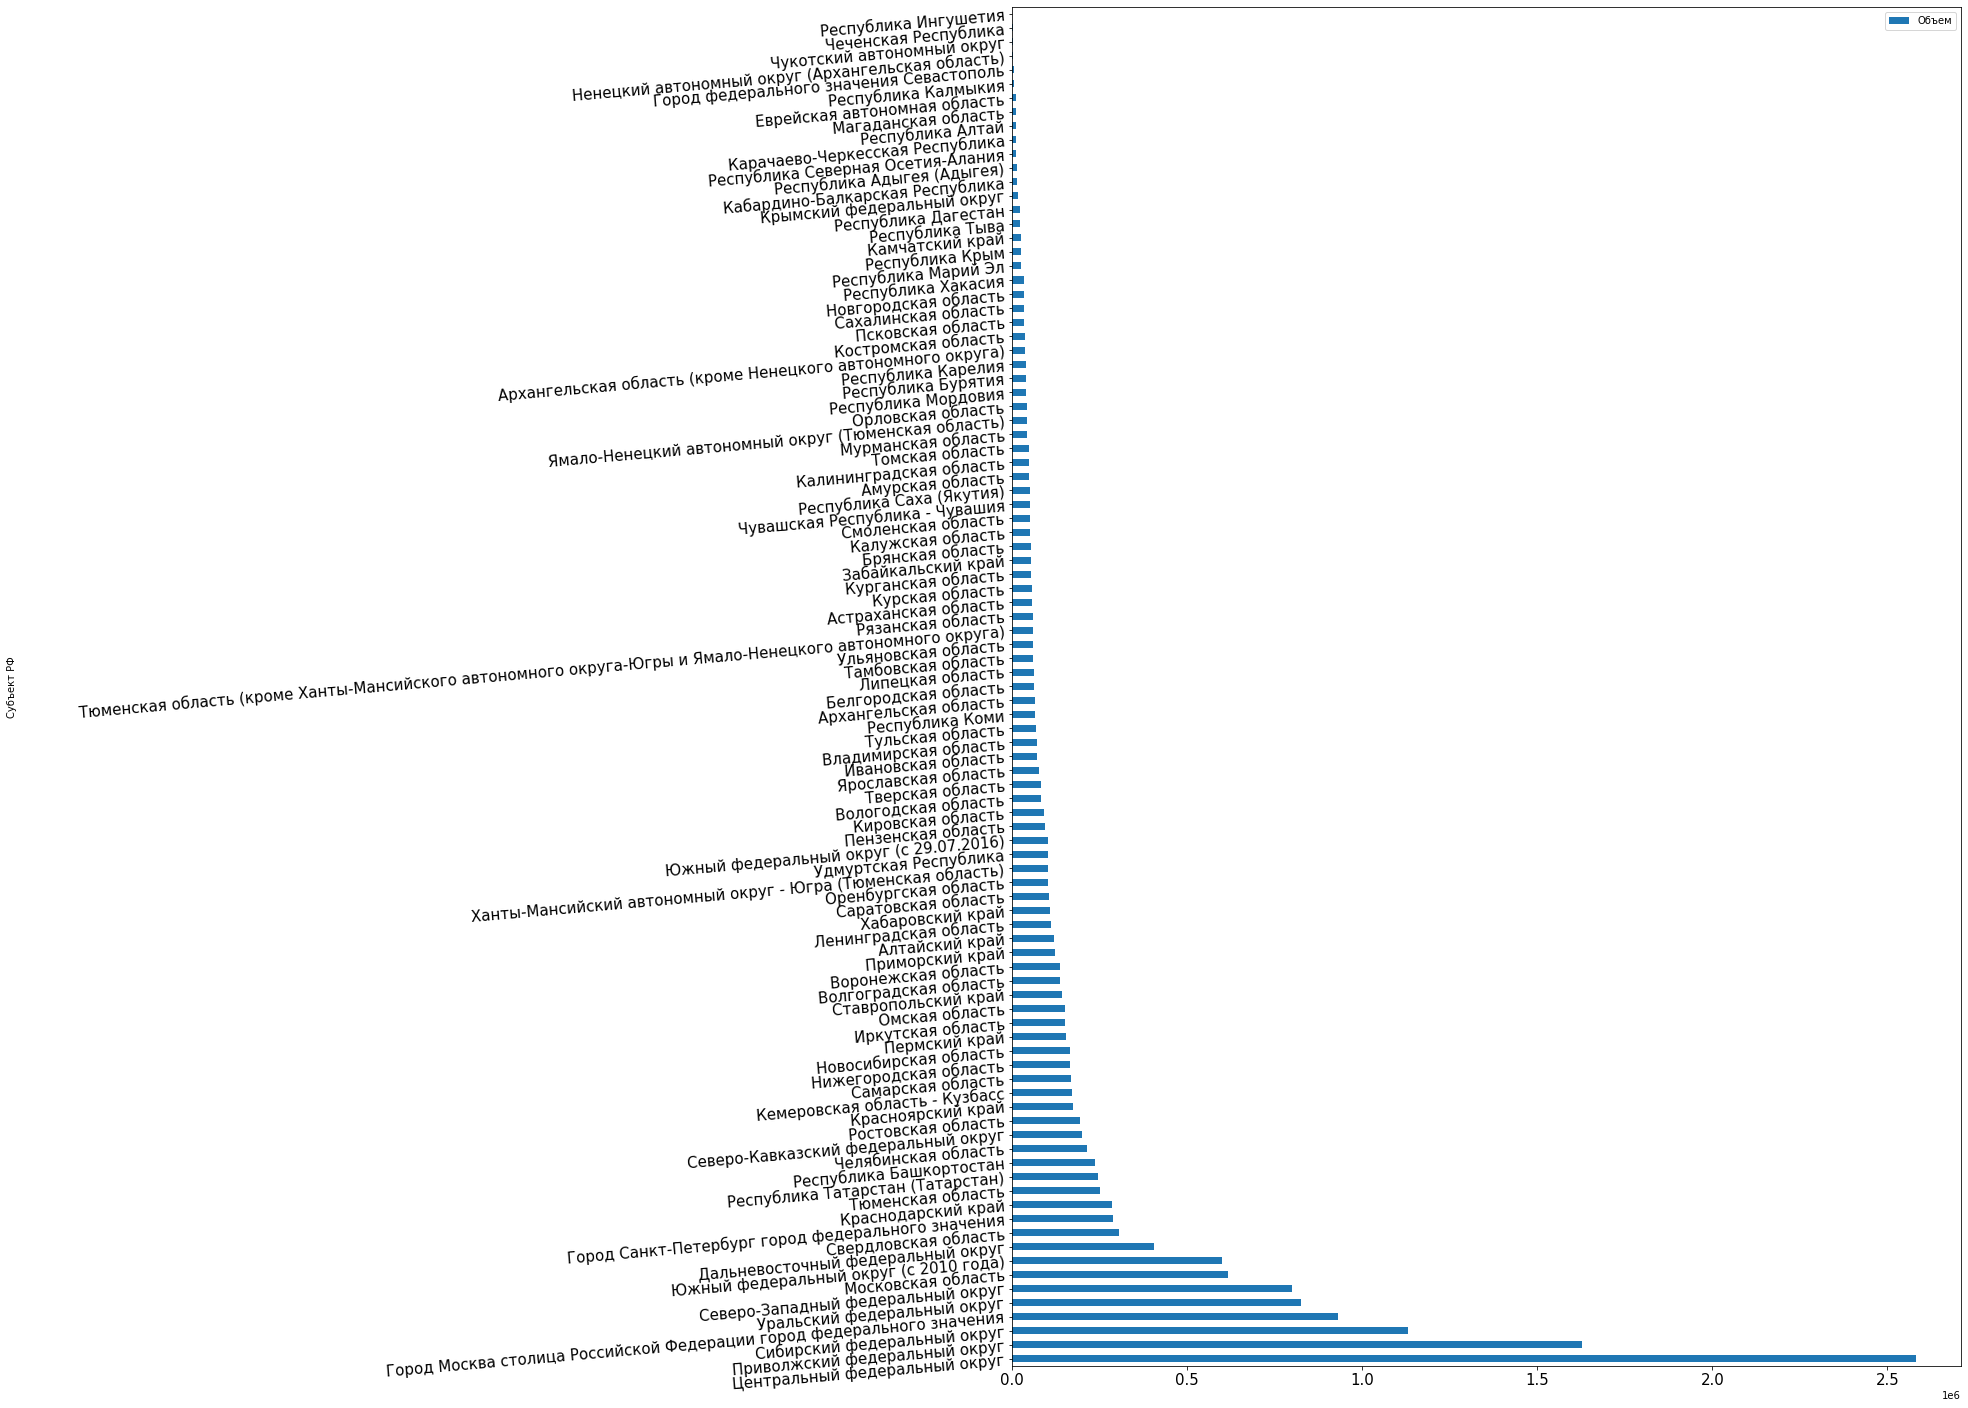

In [28]:
alco_sub.plot(x="Субъект РФ", y="Объем", kind="barh", rot=5, fontsize=15, figsize=(17,25))

#### Выявлены субъекты с самым высоким уровнем потребления алкоголя:
* Центральный ФО
* Приволжский ФО
* Сибирский ФО
* Москва
* Уральский ФО

In [29]:
subset2 = ['Год']
que2 = alco.duplicated(subset=subset2,keep=False)
df2 = alco[que2].groupby(subset2)['Объем'].sum()
alco_god = alco.groupby(subset2)['Объем'].sum().reset_index()
alco_god = alco_god.sort_values('Объем', ascending=False)

<AxesSubplot:xlabel='Год'>

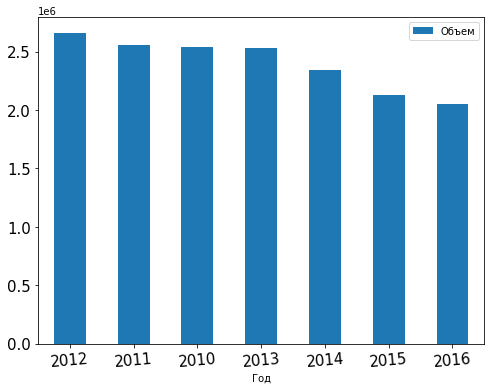

In [30]:
alco_god.plot(x="Год", y="Объем", kind="bar", rot=5, fontsize=15, figsize=(8,6))

#### Наблюдается тенденция общее уменьшения потребления алкогольных напитков. Особенно заметно сниженине в 2014 и 2015 годах

### Проверим гипотнезу: чем ниже процент алкоголь в напитках, тем выше потребление

In [31]:
subset3 = ['Продукция']
que3 = alco.duplicated(subset=subset3,keep=False)
df3 = alco[que3].groupby(subset3)['Объем'].sum()
alco_prod = alco.groupby(subset3)['Объем'].sum().reset_index()
alco_prod = alco_prod.sort_values('Объем', ascending=False)

In [32]:
alco_prod['Алкоголь'] = [6,40,11,4,12,11,4]

<AxesSubplot:>

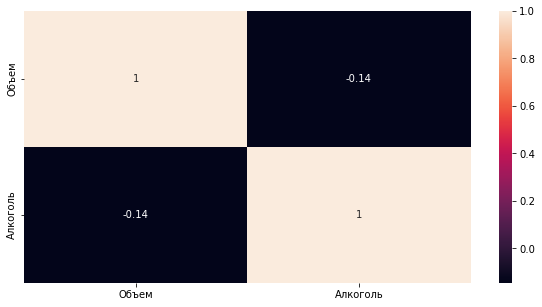

In [33]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.heatmap(alco_prod.corr(),annot=True)

<div class='alert alert-block alert-success'>
<b>Корреляция между процентом алкоголя в напитке и объемом потребления не выявлена</b>
</div>

### Результаты
<ol>
<li>Датасет, скаченный с сайта статистики, приведен в вид для анализа</li>
<li>Выявлены 7 наиболее популярных категорий спиртных напитков</li>
<li>Доказано отсутвие выбросов и пригодность данных для анализа</li>
<li>Проанализированы объемы потребления алкогольных напитков по годам</li>
<li>Проанализированы регионы РФ по объему потребления алкогольных напитков</li>
<li>Выявлено стабильное уменьшение потребление алкогольных напитков</li>
<li>Доказано отсвутсвие связи объемов потребления с процентом содержания алкоголя в напитках</li>
</ol>